Need to restart the kernal to run each pollutant

In [1]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import tensorflow as tf
from tensorflow import keras

# gradient boosting 
from xgboost import XGBRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error

/Users/yangruoxi/opt/anaconda3/envs/keras/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv("data.csv")
data = np.array(data)

# XGB_PM2.5

In [18]:
labels_pm25 = data[:,2]
data_pm25 = data[:,9:13]

labels_pm25 = np.array(labels_pm25)
data_pm25 = np.array(data_pm25)

In [19]:
column_names = ['windspeedKmph', 'winddirdegree', 'tempC', 'humidity']

df = pd.DataFrame(data_pm25, columns=column_names)
df.head()

,windspeedKmph,winddirdegree,tempC,humidity
0,3,253,8,85
1,4,275,7,83
2,5,298,7,81
3,6,320,7,80
4,6,325,7,79


In [20]:
# 80% for train and 20% for test
train_data = data_pm25[0:int(len(data_pm25)*0.8)]
train_labels = labels_pm25[0:int(len(data_pm25)*0.8)]
test_data = data_pm25[int(len(data_pm25)*0.8):int(len(data_pm25))]
test_labels = labels_pm25[int(len(data_pm25)*0.8):int(len(data_pm25))]

train_data = np.array(train_data, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_data = np.array(test_data, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

print("Training set: {}".format(train_data.shape))  # 7008 examples, 4 features
print("Testing set:  {}".format(test_data.shape))   # 1752 examples, 4 features

Training set: (7008, 4)
Testing set:  (1752, 4)


In [21]:
# XGB parameters (extreme gradient boosting)
params_xgb = {'objective': 'reg:squarederror',
              #'base_score': 0.5,     # chosen as median of validation set
              'n_estimators': 300,  # number of trees to use
              'learning_rate': 0.01, 
              'max_depth': 10,       # how many levels are in each tree
              #'subsample': 1,
              #'colsample_bytree': 0.8,
              # REGULARIZATION  alpha (L2) and lambda (L1)
              'reg_alpha': 1,
              'reg_lambda': 0,}

In [22]:
model = XGBRegressor(**params_xgb)

In [23]:
%%time
model.fit(train_data, train_labels)

CPU times: user 7.89 s, sys: 1.07 s, total: 8.97 s
Wall time: 1.51 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=0, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

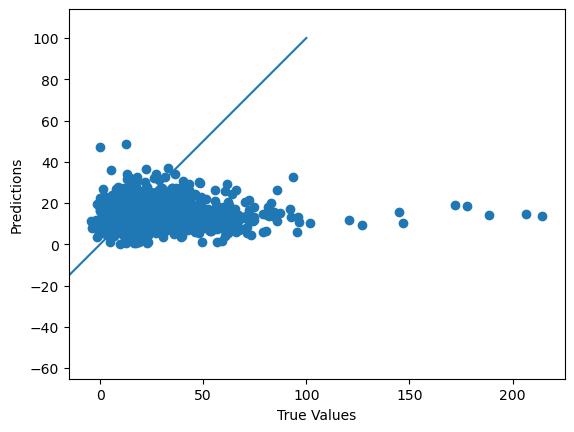

In [24]:
test_predictions = model.predict(test_data)

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

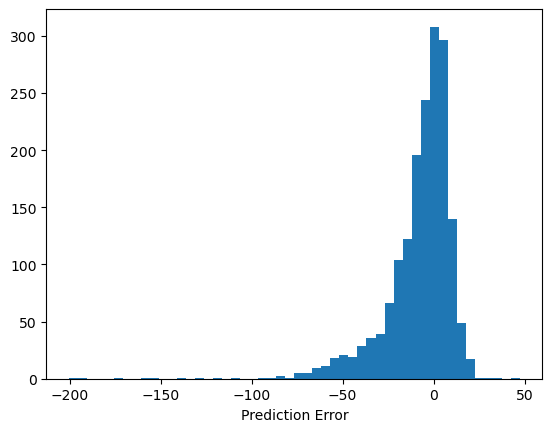

In [25]:
# histogram
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.show()

In [26]:
mse = mean_squared_error(test_labels, test_predictions)
print(f'the mse is {mse}')

the mse is 467.1636047363281


In [27]:
from sklearn.metrics import r2_score
r2_score(test_labels,test_predictions)

-0.19925308755583515

In [28]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

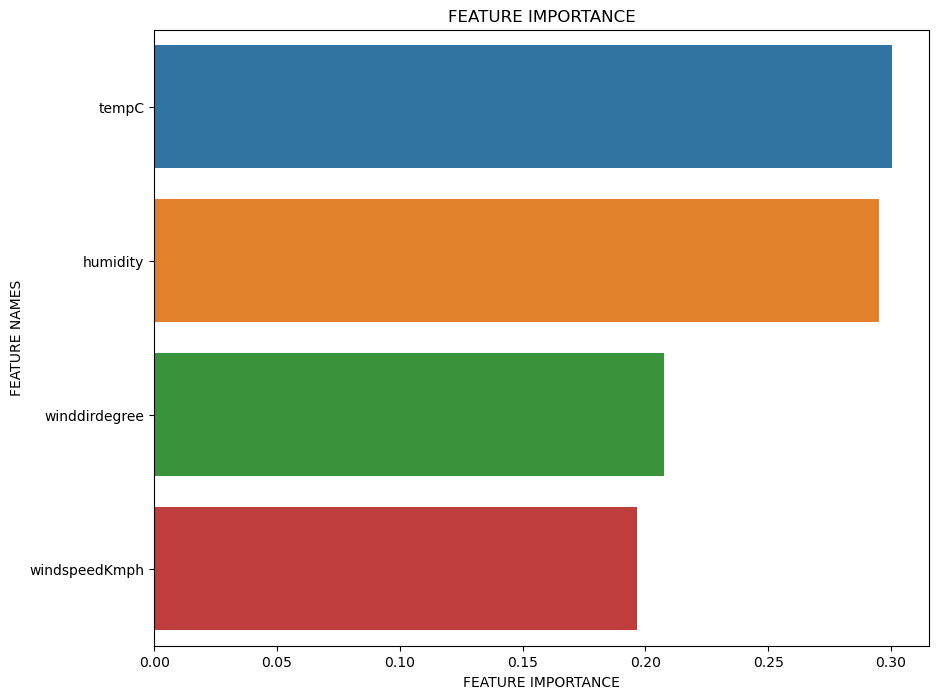

In [29]:
plot_feature_importance(model.feature_importances_, df.columns)

# XGB_NOx

In [3]:
labels_NOx = data[:,3]
data_NOx = data[:,9:13]

labels_NOx = np.array(labels_NOx)
data_NOx = np.array(data_NOx)

In [4]:
column_names = ['windspeedKmph', 'winddirdegree', 'tempC', 'humidity']

df = pd.DataFrame(data_NOx, columns=column_names)
df.head()

,windspeedKmph,winddirdegree,tempC,humidity
0,3,253,8,85
1,4,275,7,83
2,5,298,7,81
3,6,320,7,80
4,6,325,7,79


In [5]:
# 80% for train and 20% for test
train_data = data_NOx[0:int(len(data_NOx)*0.8)]
train_labels = labels_NOx[0:int(len(data_NOx)*0.8)]
test_data = data_NOx[int(len(data_NOx)*0.8):int(len(data_NOx))]
test_labels = labels_NOx[int(len(data_NOx)*0.8):int(len(data_NOx))]

train_data = np.array(train_data, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_data = np.array(test_data, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

print("Training set: {}".format(train_data.shape))  # 7008 examples, 4 features
print("Testing set:  {}".format(test_data.shape))   # 1752 examples, 4 features

Training set: (7008, 4)
Testing set:  (1752, 4)


In [6]:
# XGB parameters (extreme gradient boosting)
params_xgb = {'objective': 'reg:squarederror',
              #'base_score': 0.5,     # chosen as median of validation set
              'n_estimators': 300,  # number of trees to use
              'learning_rate': 0.01, 
              'max_depth': 10,       # how many levels are in each tree
              #'subsample': 1,
              #'colsample_bytree': 0.8,
              # REGULARIZATION  alpha (L2) and lambda (L1)
              'reg_alpha': 1,
              'reg_lambda': 0,}

In [7]:
model = XGBRegressor(**params_xgb)

In [8]:
%%time
model.fit(train_data, train_labels)

CPU times: user 8.86 s, sys: 1.28 s, total: 10.1 s
Wall time: 1.82 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=0, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

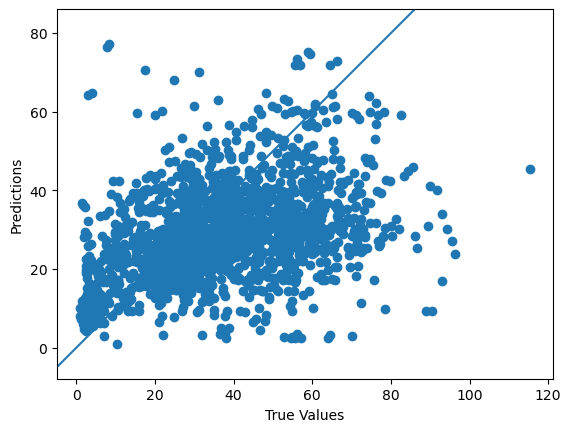

In [9]:
test_predictions = model.predict(test_data)

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

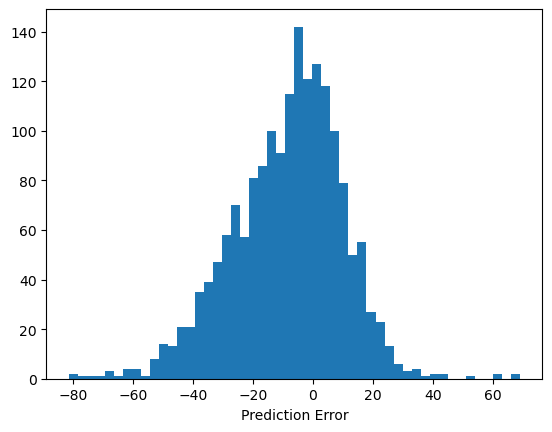

In [10]:
# histogram
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.show()

In [11]:
mse = mean_squared_error(test_labels, test_predictions)
print(f'the mse is {mse}')

the mse is 406.3167724609375


In [12]:
from sklearn.metrics import r2_score
r2_score(test_labels,test_predictions)

-0.1353139445102982

In [13]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

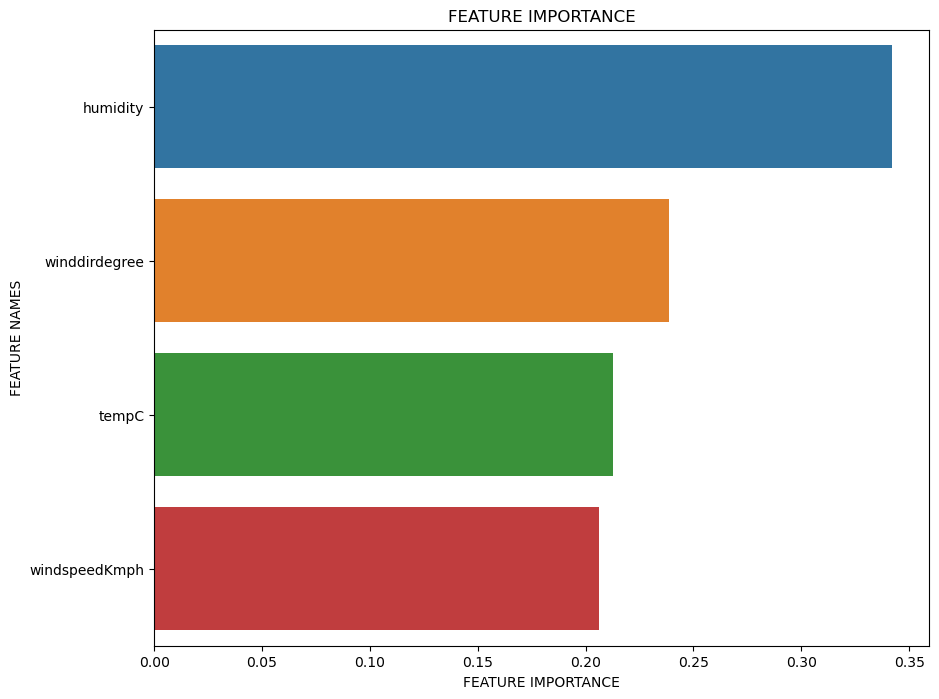

In [14]:
plot_feature_importance(model.feature_importances_, df.columns)

# XGB_SO2

In [3]:
labels_SO2 = data[:,4]
data_SO2 = data[:,9:13]

labels_SO2 = np.array(labels_SO2)
data_SO2 = np.array(data_SO2)

In [4]:
column_names = ['windspeedKmph', 'winddirdegree', 'tempC', 'humidity']

df = pd.DataFrame(data_SO2, columns=column_names)
df.head()

,windspeedKmph,winddirdegree,tempC,humidity
0,3,253,8,85
1,4,275,7,83
2,5,298,7,81
3,6,320,7,80
4,6,325,7,79


In [5]:
# 80% for train and 20% for test
train_data = data_SO2[0:int(len(data_SO2)*0.8)]
train_labels = labels_SO2[0:int(len(data_SO2)*0.8)]
test_data = data_SO2[int(len(data_SO2)*0.8):int(len(data_SO2))]
test_labels = labels_SO2[int(len(data_SO2)*0.8):int(len(data_SO2))]

train_data = np.array(train_data, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_data = np.array(test_data, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

print("Training set: {}".format(train_data.shape))  # 7008 examples, 4 features
print("Testing set:  {}".format(test_data.shape))   # 1752 examples, 4 features

Training set: (7008, 4)
Testing set:  (1752, 4)


In [6]:
# XGB parameters (extreme gradient boosting)
params_xgb = {'objective': 'reg:squarederror',
              #'base_score': 0.5,     # chosen as median of validation set
              'n_estimators': 300,  # number of trees to use
              'learning_rate': 0.01, 
              'max_depth': 10,       # how many levels are in each tree
              #'subsample': 1,
              #'colsample_bytree': 0.8,
              # REGULARIZATION  alpha (L2) and lambda (L1)
              'reg_alpha': 1,
              'reg_lambda': 0,}

In [7]:
model = XGBRegressor(**params_xgb)

In [8]:
%%time
model.fit(train_data, train_labels)

CPU times: user 9.14 s, sys: 1.65 s, total: 10.8 s
Wall time: 2 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=0, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

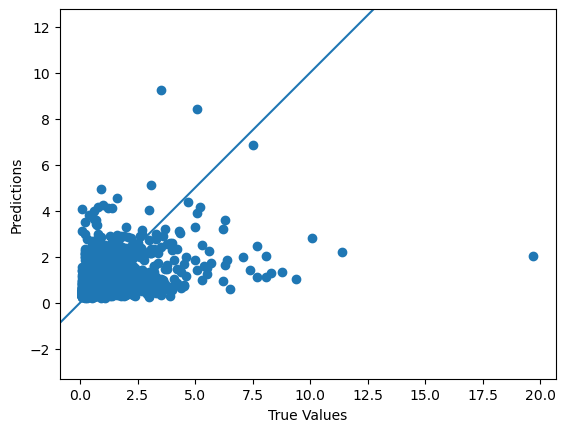

In [9]:
test_predictions = model.predict(test_data)

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

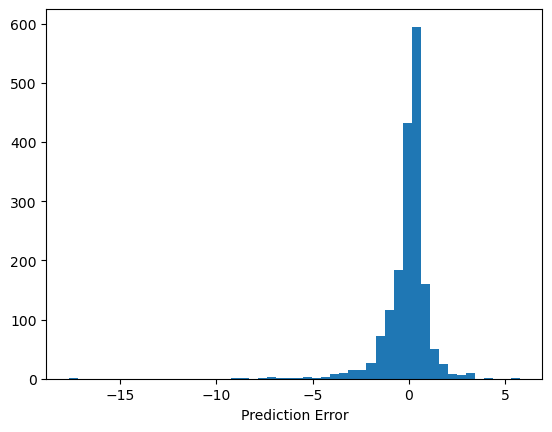

In [10]:
# histogram
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.show()

In [11]:
mse = mean_squared_error(test_labels, test_predictions)
print(f'the mse is {mse}')

the mse is 1.3974403142929077


In [12]:
from sklearn.metrics import r2_score
r2_score(test_labels,test_predictions)

0.09010037076013178

In [13]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

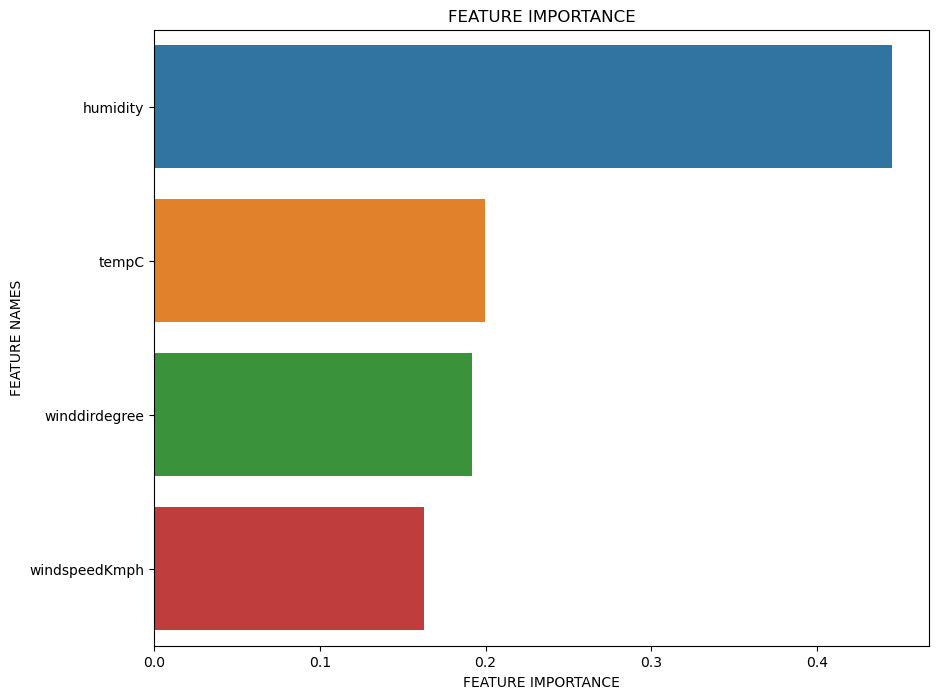

In [14]:
plot_feature_importance(model.feature_importances_, df.columns)